# About Dataset

# Context


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



# Content

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)


## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Inspiration 

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not? 

# Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [2]:
#Reading and displaying the dataset
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Exploratory Data Analysis

In [4]:
diabetes_df.shape

(768, 9)

In [5]:
#Available columns
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Know more about dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Know more about dataset with Transpose
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
#Checking to see if dataset has null values
diabetes_df.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [10]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It can be inferred from the null value check we did above that there are no values however, I realised after taking a look at the display of the data that null values were replaced with 0 which kind of dents the authenticity of the data.

In [11]:
#Replacing 0 values with the NAN values so that we can impute it later to maintain the authenticity of the dataset
#as well as trying to have a better Imputation approach i.e to apply mean values of each column 
#to the null values of the respective columns.
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

# Data Visualization

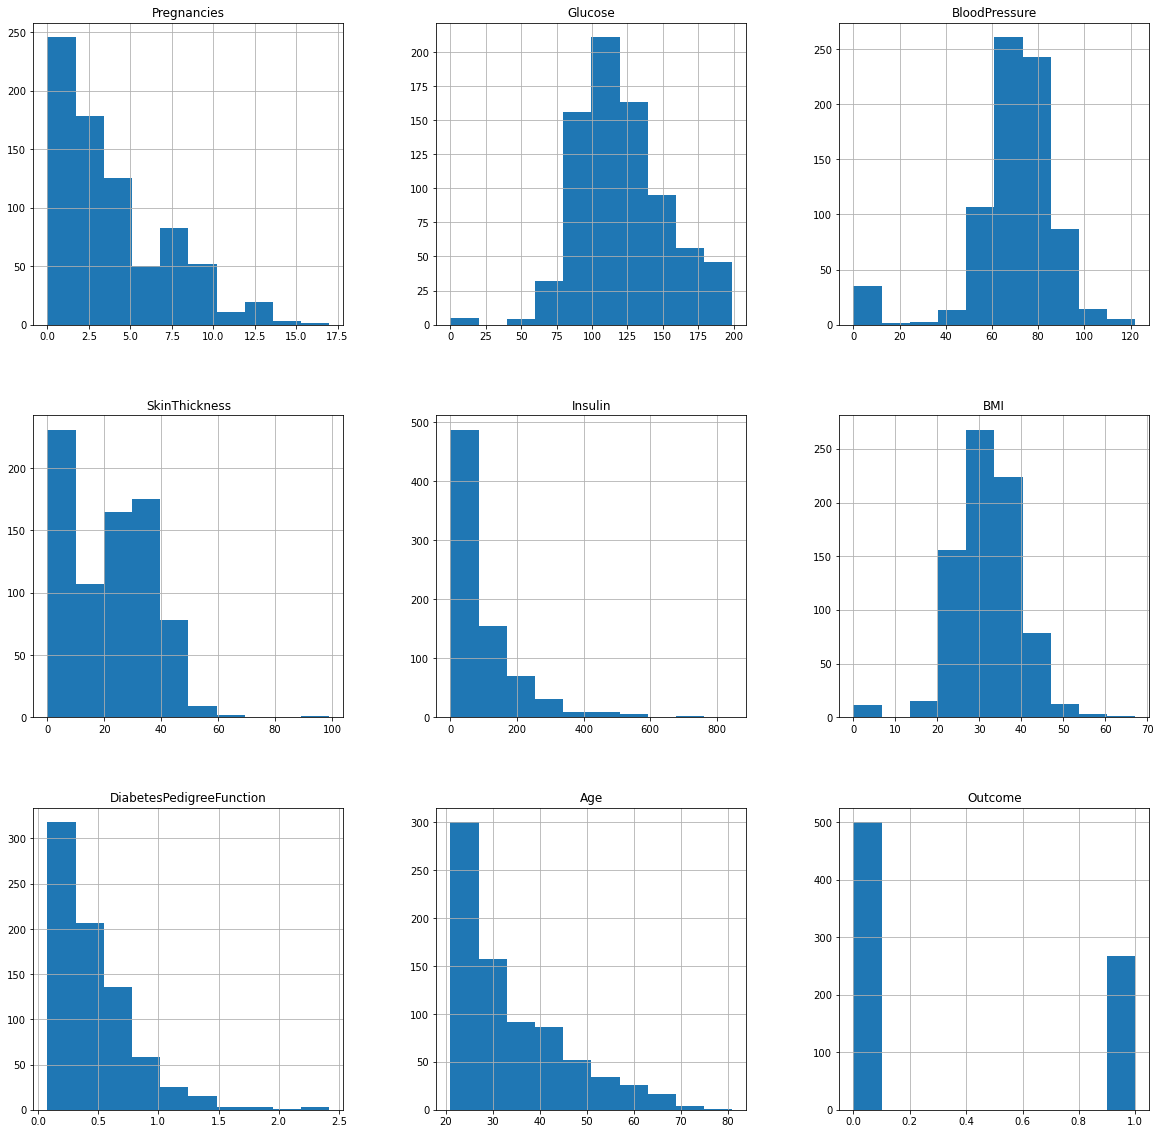

In [12]:
#Plotting distributions
p = diabetes_df.hist(figsize =(20,20))

In [13]:
#Imputing the mean value of the column 
#to each missing value of that particular column
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

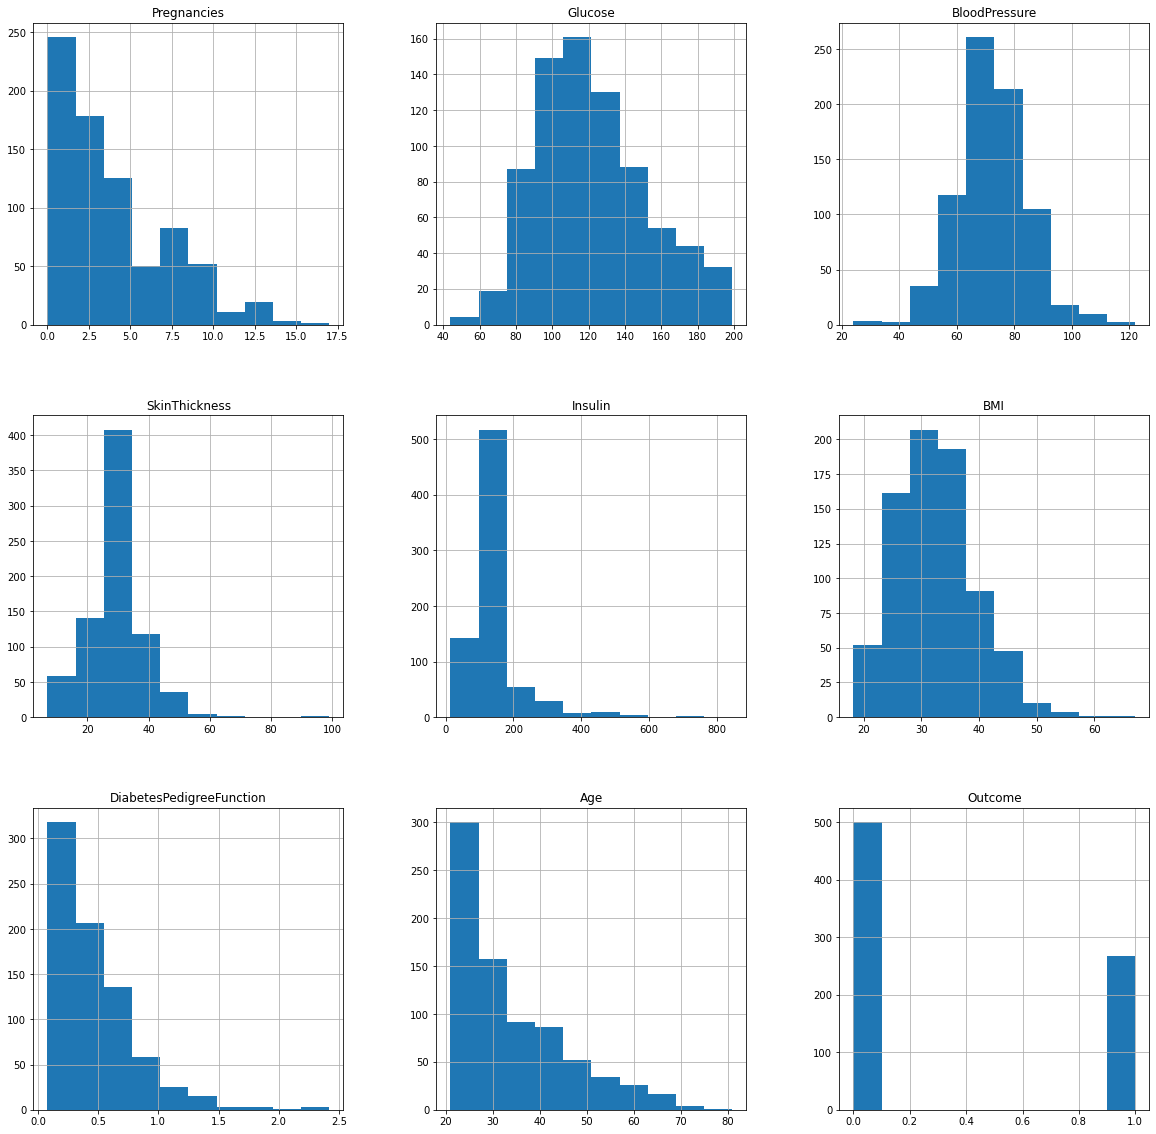

In [14]:
#Plotting distributions after removing the NAN values
p = diabetes_df_copy.hist(figsize = (20,20))

## Plotting null count analysis graph

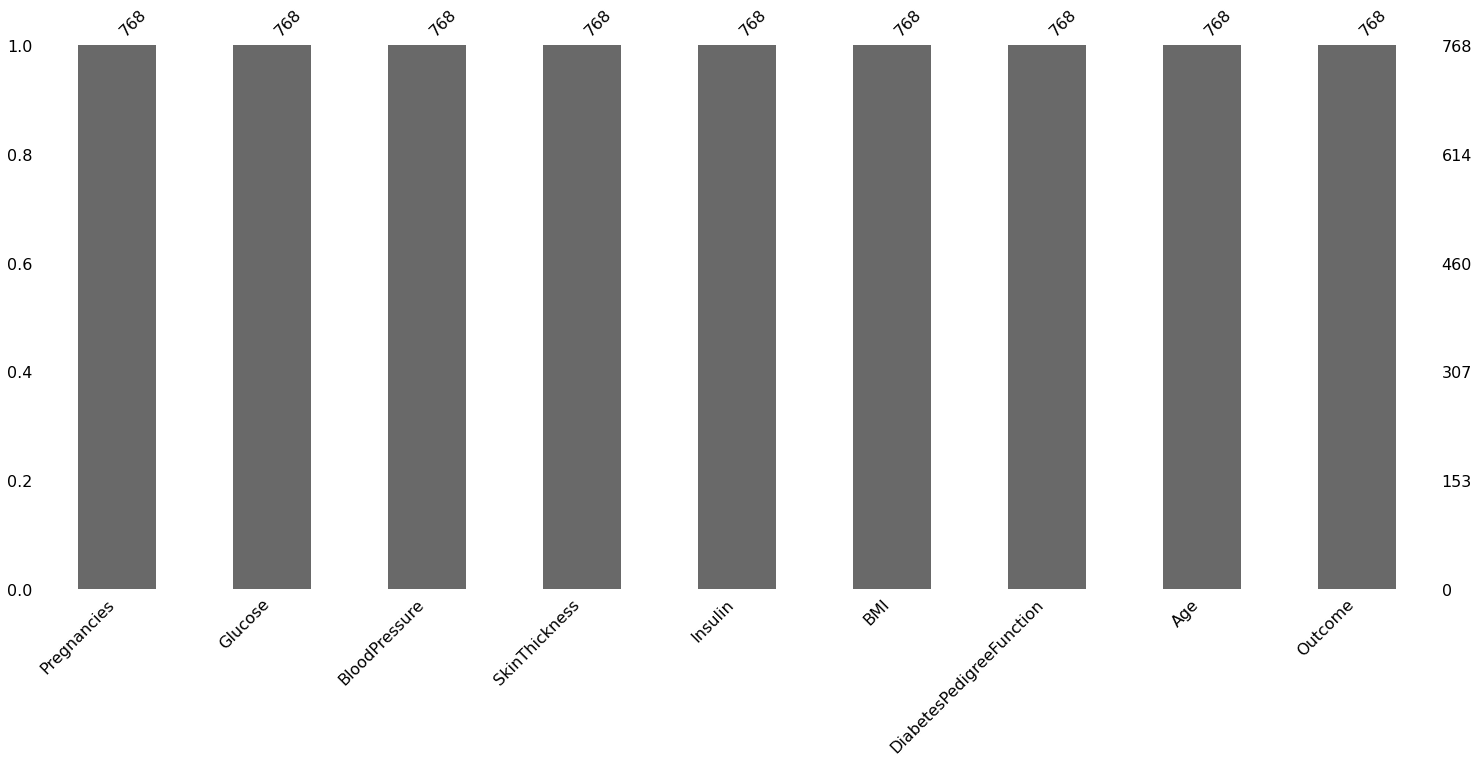

In [15]:
import missingno as msno
p = msno.bar(diabetes_df)

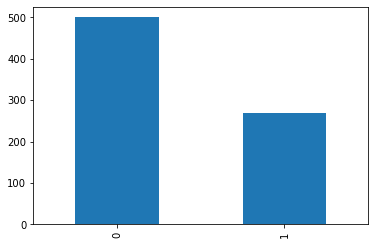

In [16]:
#Plotting count of Outcomes 
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

From the above visualization, we can infer that our dataset is completely imbalanced because the number of patients who are diabetic is half of the patients who are non-diabetic.

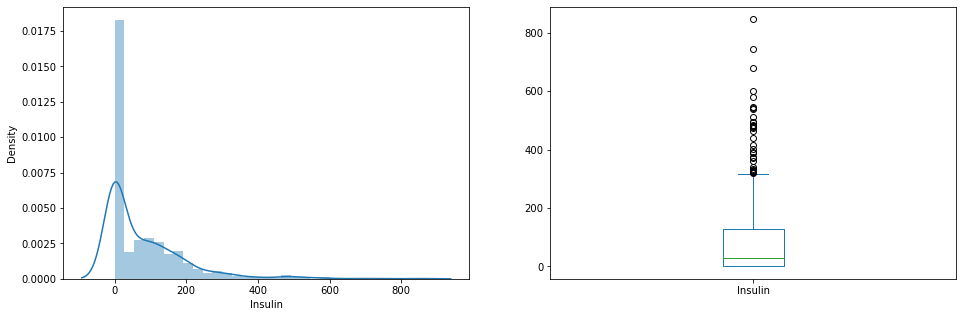

In [17]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

Distplot helps us to see the distribution of the data with the help of boxplot. One can see the outliers in that column and other information which can be deduced from the box and whiskers plot.

# Finding the correlation between all the features

<AxesSubplot:>

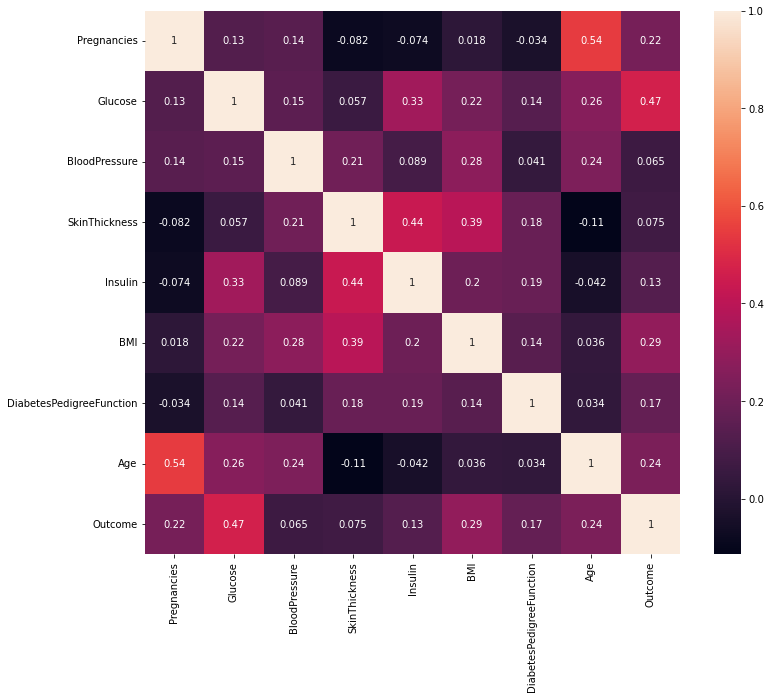

In [18]:
#Correlation between the features
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_df.corr(), annot=True)

# Scaling the Data

In [19]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### After Standard Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = pd.DataFrame(ss.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


# Building Model

## Splitting the dataset

In [21]:
X = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df['Outcome']

In [22]:
#splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

# Finding out the best Model

## Logistic Regression 

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[122,  20],
       [ 42,  47]], dtype=int64)

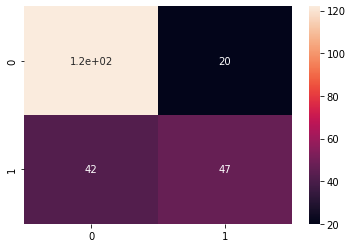

In [25]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [26]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.7316017316017316


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

#Training decision tree classifier on training set
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [28]:
#Getting the accuracy score for Decision Tree
from sklearn import metrics
predictions = decision_tree.predict(X_test)
print("Accuracy Score=",format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score= 0.7056277056277056


In [29]:
#Classification report and confusion matrix of the decision tree model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[113  29]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       142
           1       0.63      0.56      0.60        89

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.70       231



# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
#Training Random Forest classifier
rfc = RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)



In [31]:
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[128,  14],
       [ 39,  50]], dtype=int64)

In [32]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, prediction3)))

Accuracy_Score = 0.7705627705627706


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       142
           1       0.78      0.56      0.65        89

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



# XgBoost Classifier

In [34]:
from xgboost  import XGBClassifier

#Training the XgBoost Classifier on the training set
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7575757575757576


In [36]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[113  29]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       142
           1       0.63      0.56      0.60        89

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.70       231



## Support Vector Machine 

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [48]:
pred = svc.predict(X_test)

In [49]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, pred)))

Accuracy Score = 0.7662337662337663


In [50]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[132  10]
 [ 44  45]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       142
           1       0.82      0.51      0.63        89

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.77      0.75       231



# Conclusion

Random Forest Classifier has the highest accuracy score of 0.76 and this makes it the best model for this prediction

In [51]:
#Getting feature importances
rfc.feature_importances_

array([0.10450634, 0.22511907, 0.08661974, 0.07432654, 0.07377624,
       0.16517996, 0.13529703, 0.13517507])

<AxesSubplot:>

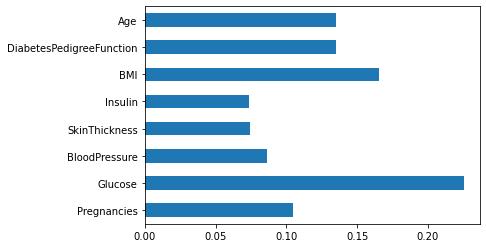

In [52]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh')) 

From the graph above, Glucose is the most important feature of the dataset.

In [53]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.37, 0.63],
       [0.51, 0.49],
       [0.31, 0.69],
       [0.85, 0.15],
       [0.97, 0.03],
       [0.82, 0.18],
       [0.21, 0.79],
       [0.17, 0.83],
       [0.87, 0.13],
       [0.79, 0.21],
       [0.52, 0.48],
       [0.62, 0.38],
       [1.  , 0.  ],
       [0.84, 0.16],
       [0.91, 0.09],
       [0.49, 0.51],
       [0.5 , 0.5 ],
       [0.87, 0.13],
       [0.56, 0.44],
       [0.76, 0.24],
       [0.49, 0.51],
       [0.91, 0.09],
       [0.59, 0.41],
       [0.35, 0.65],
       [0.25, 0.75],
       [0.8 , 0.2 ],
       [0.38, 0.62],
       [0.64, 0.36],
       [0.66, 0.34],
       [0.51, 0.49],
       [0.99, 0.01],
       [0.53, 0.47],
       [0.94, 0.06],
       [0.35, 0.65],
       [0.61, 0.39],
       [0.59, 0.41],
       [0.61, 0.39],
       [0.74, 0.26],
       [0.18, 0.82],
       [0.36, 0.64],
       [0.35, 0.65],
       [0.22, 0.78],
       [0.79, 0.21],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.71, 0.29],
       [0.57, 0.43],
       [0.78,

## Saving Model

In [54]:
import pickle
 
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)
 
# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)
 
# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [55]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [57]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [58]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763rd patient

array([0], dtype=int64)